# Assignment 2
Submitted by: Abainza, Jugalbot

### Bar charts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_bar = pd.read_csv("bar_assignment.csv")
df_bar.info

<bound method DataFrame.info of    LABEL  COUNT
0      D      1
1      D      1
2      D      0
3      D      1
4      F      1
5      F      1
6      F      0
7      F      0
8      I      1
9      N      1
10     N      1
11     N      0
12     S      1
13     S      0
14     S      1
15     S      1
16     S      1
17     S      0
18     S      0
19     S      0
20     S      1
21     S      0>

In [3]:
df_bar["COUNT"] = df_bar["COUNT"].map({1: "Yes", 0: "No"})
counts_per_label = df_bar.groupby('LABEL')['COUNT'].value_counts().unstack(fill_value=0)
counts_per_label

COUNT,No,Yes
LABEL,,
D,1,3
F,2,2
I,0,1
N,1,2
S,5,5


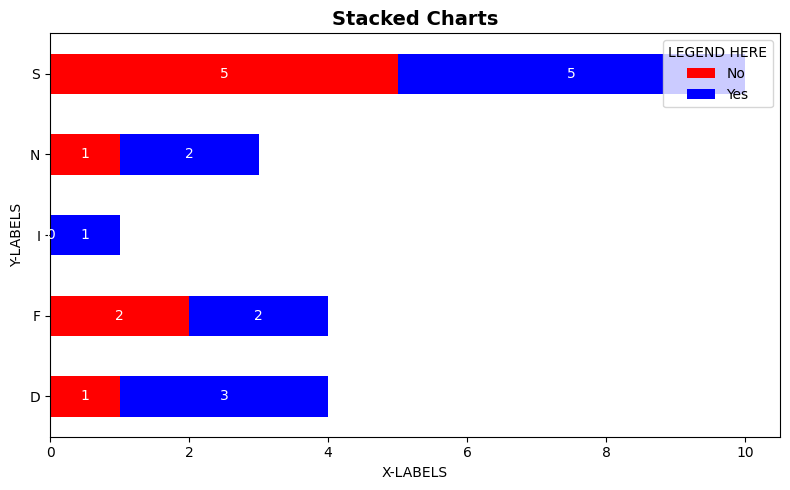

In [4]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot 'No' (red) and 'Yes' (blue) in a horizontal, stacked fashion
counts_per_label[['No','Yes']].plot(
    kind='barh',
    stacked=True,
    color=['red', 'blue'],
    ax=ax
)

ax.set_title("Stacked Charts", fontsize=14, fontweight='bold')
ax.set_xlabel("X-LABELS")
ax.set_ylabel("Y-LABELS")

ax.legend(title='LEGEND HERE', loc='upper right')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', color='white', fontsize=10)

plt.tight_layout()
plt.show()

## Sankey

In [3]:
df_bar = pd.read_csv("sankey_assignment.csv")
df_bar.info

<bound method DataFrame.info of   LABEL  PS  OMP  CNP  NRP  NMCCC  PEC  NCDM  RGS  Reg  Aca  Oth
0     S   3    4    1    1      0    0     1    1    2    7    1
1     F   0    1    2    1      1    0     0    1    2    2    0
2     D   1    1    2    0      0    0     1    1    1    3    1
3     N   1    1    1    1      0    1     1    0    2    2    1
4     I   0    1    0    0      0    0     0    0    0    1    0>

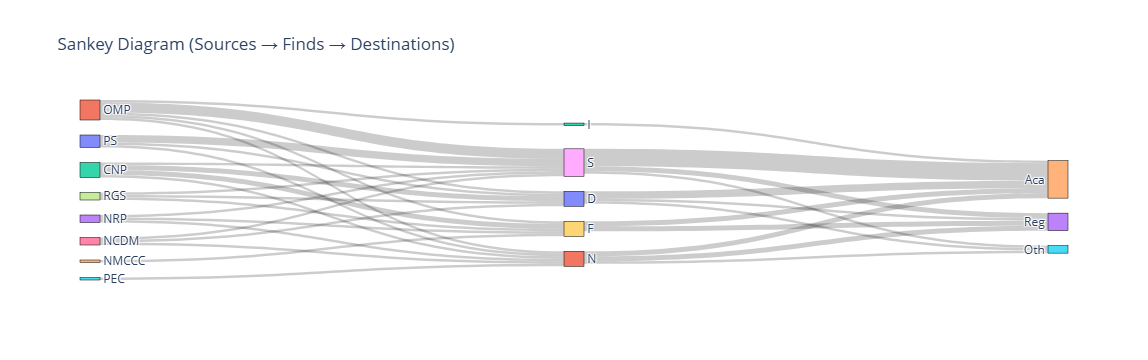

In [4]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file (update the filename as needed)
df = pd.read_csv("sankey_assignment.csv")

# Define the three sets of nodes
sources = list(df.columns[1:-3])  # ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
finds = list(df['LABEL'])          # ['S', 'F', 'D', 'N', 'I']
destinations = list(df.columns[-3:])  # ['Reg', 'Aca', 'Oth']

# Create a combined list of all unique nodes
nodes = sources + finds + destinations
node_indices = {name: i for i, name in enumerate(nodes)}  # Assigning an index to each node

# Create links from sources to finds
links = []
for _, row in df.iterrows():
    for source in sources:
        value = row[source]
        if value > 0:  # Only add non-zero flows
            links.append((source, row['LABEL'], value))  # Connect source to find

# Create links from finds to destinations
for _, row in df.iterrows():
    for destination in destinations:
        value = row[destination]
        if value > 0:  # Only add non-zero flows
            links.append((row['LABEL'], destination, value))  # Connect find to destination

# Convert links into Sankey format
sankey_links = {
    "source": [node_indices[src] for src, tgt, val in links],
    "target": [node_indices[tgt] for src, tgt, val in links],
    "value": [val for src, tgt, val in links],
}

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=sankey_links
))

# Set layout title
fig.update_layout(title_text="Sankey Diagram (Sources → Finds → Destinations)", font_size=12)

# Show the figure
fig.show()


## Network Graph

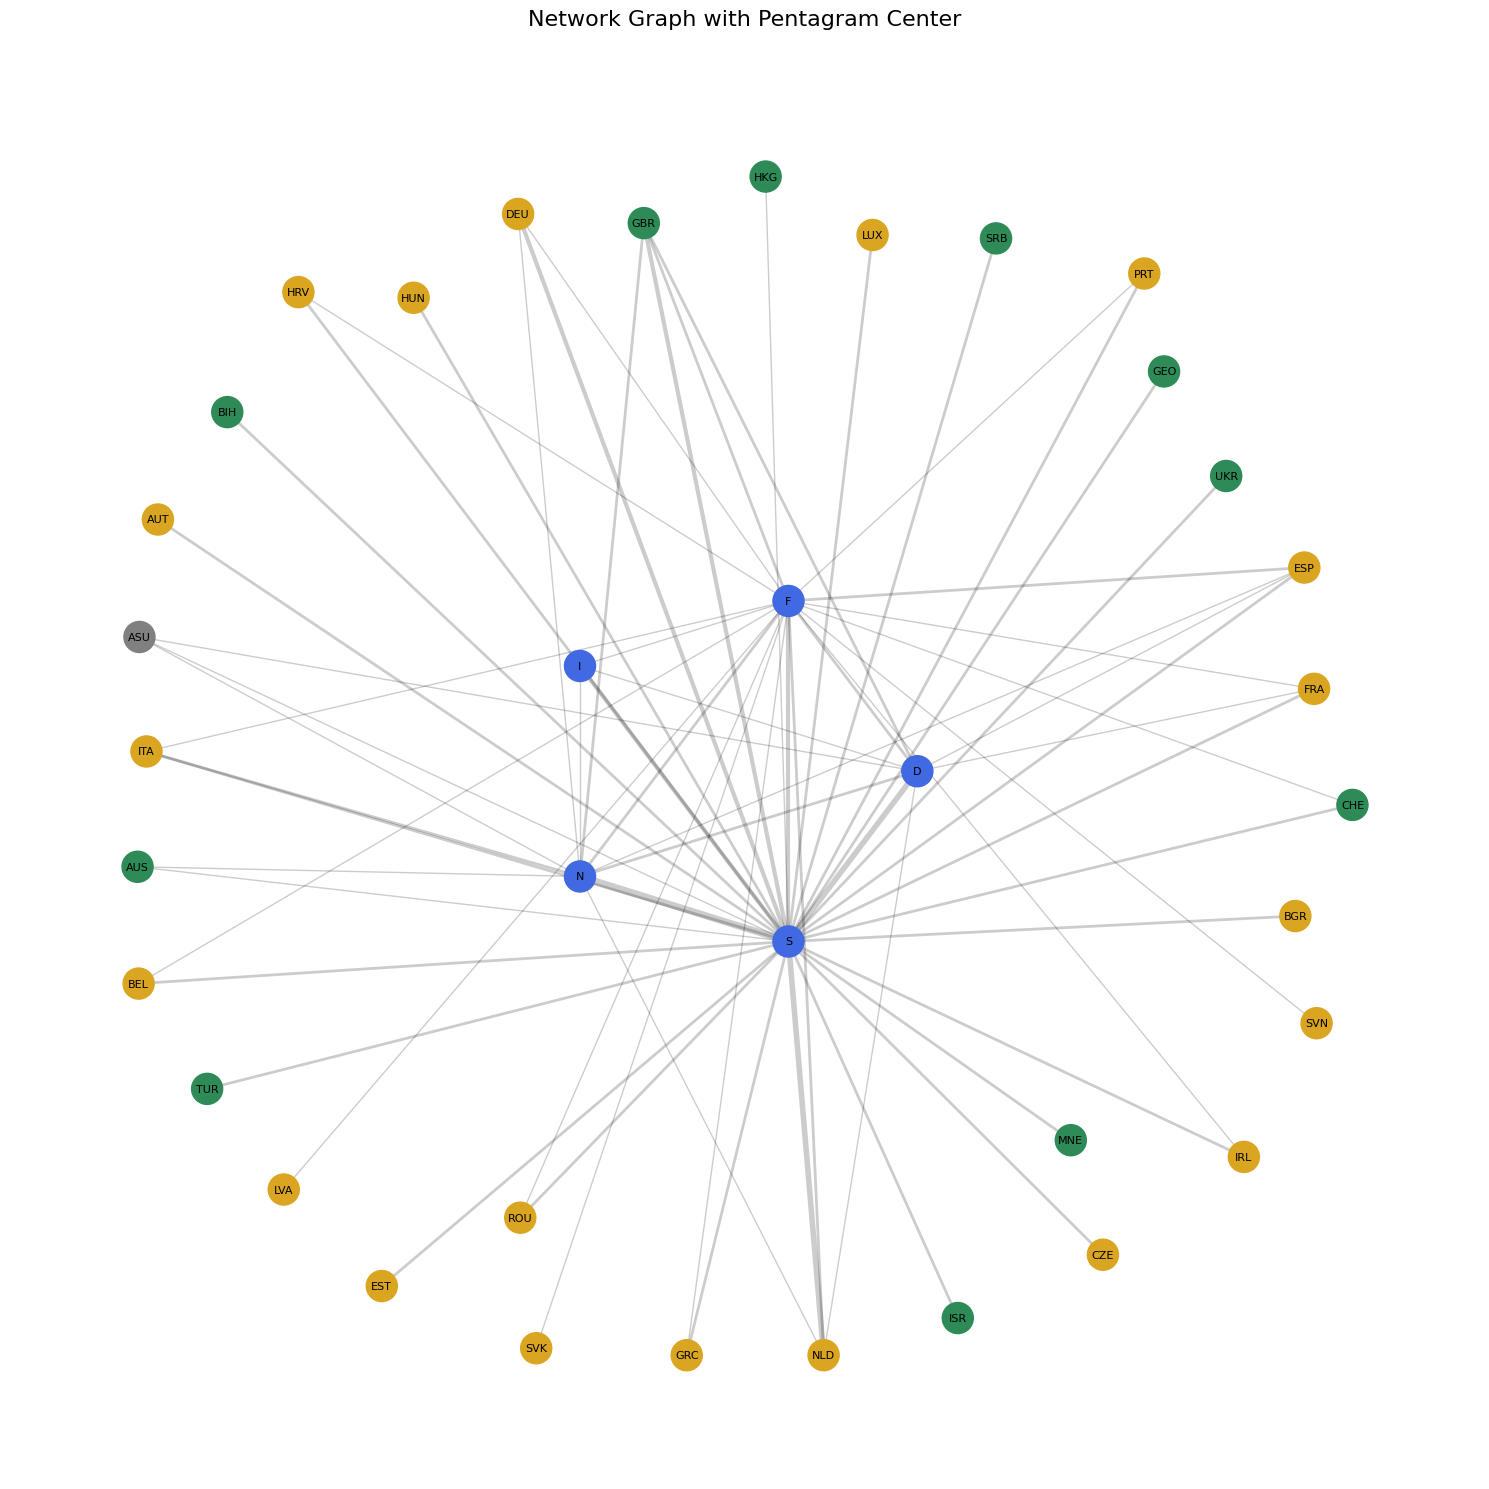

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("networks_assignment.csv")

# Create graph
G = nx.Graph()

# Parse data and create edges
headers = data.columns
for idx, row in data.iterrows():
    source = row['LABELS']
    for col in headers[1:]:  # Skip the 'LABELS' column
        value = row[col]
        if value > 0:
            G.add_edge(source, col, weight=float(value))

# Define node colors
blue_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 
                'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Create color map
color_map = []
for node in G.nodes():
    if node in blue_nodes:
        color_map.append('#4169E1')
    elif node in green_nodes:
        color_map.append('#2E8B57')
    elif node in yellow_nodes:
        color_map.append('#DAA520')
    else:
        color_map.append('gray')

# Set up the plot
plt.figure(figsize=(15, 15))

# Calculate pentagram positions for central nodes
pentagon_radius = 0.3
pentagon_angles = np.linspace(0, 2*np.pi, len(blue_nodes), endpoint=False)
pentagon_pos = {node: (pentagon_radius * np.cos(angle), pentagon_radius * np.sin(angle)) 
               for node, angle in zip(blue_nodes, pentagon_angles)}

# Position other nodes using spring layout
other_nodes = [n for n in G.nodes() if n not in blue_nodes]
other_pos = nx.spring_layout(G.subgraph(other_nodes), k=1, iterations=50)

# Combine positions
pos = {**pentagon_pos, **other_pos}

# Draw the network
nx.draw_networkx_edges(G, pos, alpha=0.2, width=[G[u][v]['weight'] for u, v in G.edges()])
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=8)

# Add title and remove axes
plt.title("Network Graph with Pentagram Center", pad=20, size=16)
plt.axis('off')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()